# Titanic Survival Rate Exploratory Data Analysis

## Introduction
This Jupyter notebook explores the Titanic dataset, aiming to understand the survival rate of passengers. The analysis covers various aspects such as gender, passenger class, age groups, embarkation points, and more.

### Importing important Libraries that would be used for the analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Overview
The dataset is loaded from [this link](https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv). Initial exploration includes checking the first few rows, general information, and descriptive statistics of the dataset.

In [2]:
# Load Titanic dataset
titanic_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv', sep=',')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning
Identification and handling of missing values and duplicate entries. NaN values in the 'Age' column are dropped to facilitate age-related analysis.


* Checking the data information for each rows

In [3]:
# Display information about the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Performing Statistical analysis to determine each columns, to see if there are any outliers or abnomalies

In [4]:
# Display descriptive statistics of the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### **Observations**
###### **PassengerId**:

* Ranges from 1 to 891, indicating unique identifiers for passengers.
* Continuous numerical values with no missing entries.

##### **Survived**:
* Binary variable (0 or 1) indicating survival status.
* About 38.4% of passengers survived based on the mean.

##### **Pclass**:
* Categorical variable representing passenger class (1, 2, or 3).
* Majority of passengers are in classes 2 and 3, as suggested by the mean.

##### **Age**:
* Age ranges from 0.42 to 80, with some missing entries (891 total entries, 714 non-null for age).
* Mean age is approximately 29.7, and there's a notable standard deviation of 14.53.

##### **SibSp**:
* Describes the number of siblings/spouses aboard.
* Average is around 0.52, with a maximum of 8 siblings/spouses.

##### **Parch**:
* Represents the number of parents/children aboard.
* Mean is approximately 0.38, with a maximum of 6 parents/children.

##### **Fare**:
* Fare ranges from 0 to 512.33.
* The mean fare is approximately 32.20, with a considerable standard deviation of 49.69.


In [5]:
# Display column names
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Display counts of passengers by gender
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
# Display the count of missing values for each column
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Age:**
  - There are 177 missing values in the 'Age' column.
  - Imputing or handling these missing values may be necessary for a complete analysis.

- **Cabin:**
  - A substantial 687 missing values in the 'Cabin' column.
  - Considering the extent of missing data, it might be challenging to utilize this feature effectively.

- **Embarked:**
  - There are 2 missing values in the 'Embarked' column.
  - Imputing or addressing these missing values may be needed for a comprehensive analysis.


## Data Cleaning
Identification and handling of missing values and duplicate entries. NaN values in the 'Age' column are dropped to facilitate age-related analysis.

In [8]:
# Identify and count duplicate entries
duplicate_entries = titanic_data[titanic_data.duplicated()]
duplicate_entries.shape

(0, 12)

#### **Checking the percentage of passengers that survived the Ship**

In [9]:
# Calculate the proportion of passengers who survived
survived = titanic_data['Survived'].sum()
total_passengers = len(titanic_data)
survival_proportion = survived / total_passengers
print(f"The proportion of passengers who survived is: {survival_proportion:.2f}")

The proportion of passengers who survived is: 0.38


* 38% of Passengers onboard survived

#### Checking the average fare price

In [10]:
# Calculate and display the median fare
median_fare = titanic_data['Fare'].median()
print(f"The median fare to 4 decimal places is: {median_fare:.4f}")

The median fare to 4 decimal places is: 14.4542


## Gender-based Analysis
An examination of survival rates based on gender, including the proportion of men and women who survived, and their respective percentages.

In [11]:
# Calculate and display the percentage of survival for men and women
total_men = titanic_data[titanic_data['Sex'] == 'male']['Survived'].count()
total_women = titanic_data[titanic_data['Sex'] == 'female']['Survived'].count()

survived_men = titanic_data[(titanic_data['Sex'] == 'male') & (titanic_data['Survived'] == 1)]['Survived'].count()
survived_women = titanic_data[(titanic_data['Sex'] == 'female') & (titanic_data['Survived'] == 1)]['Survived'].count()

percentage_survived_men = (survived_men / total_men) * 100 if total_men > 0 else 0
percentage_survived_women = (survived_women / total_women) * 100 if total_women > 0 else 0

print(f"Percentage of Men that survived is: {percentage_survived_men:.2f}")
print(f"Percentage of Women that survived is: {percentage_survived_women:.2f}")

Percentage of Men that survived is: 18.89
Percentage of Women that survived is: 74.20


* More Percentage of women survived compared to men, with over **74%** of women surviving and only **18.89%** of men surviving.

In [12]:
# Display unique values in the 'Pclass' column
titanic_data['Pclass'].unique()

array([3, 1, 2])

## Passenger Class Analysis
Analysis of survival rates across different passenger classes, calculating the percentage of survivors in each class.

In [13]:
# Calculate and display the percentage of survival for different passenger classes
first_class = titanic_data[titanic_data['Pclass'] == 1]['Survived'].count()
second_class = titanic_data[titanic_data['Pclass'] == 2]['Survived'].count()
third_class = titanic_data[titanic_data['Pclass'] == 3]['Survived'].count()

first_class_survived = titanic_data[(titanic_data['Pclass'] == 1) & (titanic_data['Survived'] == 1)]['Survived'].count()
second_class_survived = titanic_data[(titanic_data['Pclass'] == 2) & (titanic_data['Survived'] == 1)]['Survived'].count()
third_class_survived = titanic_data[(titanic_data['Pclass'] == 3) & (titanic_data['Survived'] == 1)]['Survived'].count()

percentage_survived_first_class = first_class_survived / first_class
percentage_survived_second_class = second_class_survived / second_class
percentage_survived_third_class = third_class_survived / third_class

print(f"Percentage of First Class Passengers that survived is: {percentage_survived_first_class:.3f}")
print(f"Percentage of Second Class Passengers that survived is: {percentage_survived_second_class:.3f}")
print(f"Percentage of Third Class Passengers that survived is: {percentage_survived_third_class:.3f}")

Percentage of First Class Passengers that survived is: 0.630
Percentage of Second Class Passengers that survived is: 0.473
Percentage of Third Class Passengers that survived is: 0.242


- Percentage of First Class Passengers that survived is: 63.0%
- Percentage of Second Class Passengers that survived is: 47.3%
- Percentage of Third Class Passengers that survived is: 24.2%


## Age-based Analysis
Exploration of survival rates among adults and children, including the percentage of survivors in each category.

In [14]:
# Drop NaN values in the 'Age' column and display information
titanic_age_drop_nan = titanic_data.dropna(subset=['Age'])
titanic_age_drop_nan.isna().sum()
titanic_age_drop_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [15]:
### Total Men & Women
total_adults = titanic_age_drop_nan[titanic_age_drop_nan['Age'] >= 18]['Survived'].count()
total_children = titanic_age_drop_nan[titanic_age_drop_nan['Age'] < 18]['Survived'].count()

### Suvival Count
survived_adults = titanic_age_drop_nan[(titanic_age_drop_nan['Age'] >= 18) & (titanic_age_drop_nan['Survived'] == 1)]['Survived'].count()
survived_children = titanic_age_drop_nan[(titanic_age_drop_nan['Age'] < 18) & (titanic_age_drop_nan['Survived'] == 1)]['Survived'].count()

### percentage survived
percentage_survived_adults = (survived_adults / total_adults)
percentage_survived_children = (survived_children / total_children)

print(f"Percentage of Adults that survived is: {percentage_survived_adults:.2f}")
print(f"Percentage of Children that survived is: {percentage_survived_children:.2f}")

Percentage of Adults that survived is: 0.38
Percentage of Children that survived is: 0.54


- Percentage of Adults that survived is: 38%
- Percentage of Children that survived is: 54%

## Embarkation Point Analysis
Investigation of the number of passengers who survived and embarked from Southampton.

In [16]:
# Filter and display information about passengers who survived
survived_passengers = titanic_data[titanic_data['Survived'] == 1]
survived_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
# Calculate and display the number of passengers who survived and embarked from Southampton
survived_southampton = survived_passengers[survived_passengers['Embarked'] == 'S']['Survived'].count()
print(f"Number of passengers who survived and embarked from Southampton: {survived_southampton}")

Number of passengers who survived and embarked from Southampton: 217


## Fare Analysis
Identification and display of the five highest fares paid by passengers.

In [18]:
five_highest_fares = titanic_data['Fare'].nlargest(5)
five_highest_fares

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
Name: Fare, dtype: float64

- High fares:
  - Passenger 258, 679, and 737 paid 512.3292.
  
- Other notable fares:
  - Passenger 27 and 88 paid 263.0000.

## Median Age Calculation
Calculation and display of the median age of passengers.

In [19]:
# Calculate and display the median age
median_age = titanic_data['Age'].median()
print(f"Median age: {median_age}")

Median age: 28.0


## Unique Names and Sibling/Spouse Analysis
Counting the number of unique names and finding the mode of the 'SibSp' column, indicating the most common number of siblings/spouses.

In [20]:
# Find the mode of the 'SibSp' column
most_common_sibsp = titanic_data['SibSp'].mode().values[0]

# Print the result
print(f"Most of the passengers have {most_common_sibsp} siblings/spouses.")

Most of the passengers have 0 siblings/spouses.


## Correlation Analysis
Visualization of the correlation matrix using a heatmap. Calculation and display of the correlation between 'Age' and 'Survived'.

<ipython-input-21-e4ea60e6526d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), cmap='bwr', annot=True)


<Axes: >

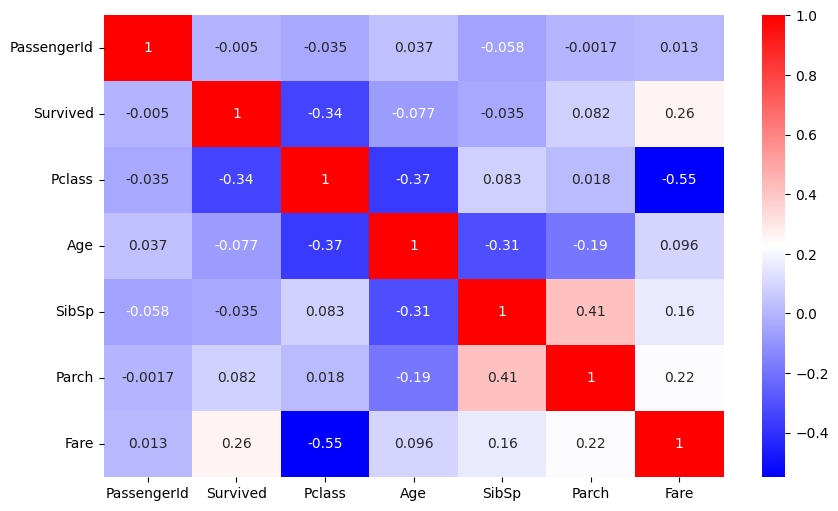

In [21]:
# Plot correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.corr(), cmap='bwr', annot=True)

In [22]:

# Calculate the correlation between 'Age' and 'Survived'
age_survived_corr = titanic_data['Age'].corr(titanic_data['Survived'])
print(f"Correlation between Age and Survived: {age_survived_corr:.4f}")

# Check for unique values in the 'Name' and 'Ticket' columns
unique_names_count = titanic_data['Name'].nunique()
unique_tickets_count = titanic_data['Ticket'].nunique()

print(f"Number of unique names: {unique_names_count}")
print(f"Number of unique tickets: {unique_tickets_count}")

Correlation between Age and Survived: -0.0772
Number of unique names: 891
Number of unique tickets: 681


## Conclusion

In this exploratory data analysis (EDA) of the Titanic dataset, we delved into various aspects to uncover insights into the survival rates of passengers. Here are the key takeaways:

## Gender Impact on Survival
The analysis revealed a significant disparity in survival rates between genders. A higher percentage of women survived compared to men. This aligns with the historical prioritization of women and children during emergencies.

## Passenger Class Influence
Passenger class played a crucial role in determining survival chances. First-class passengers had a higher survival rate compared to those in second and third classes. This observation may be attributed to priority given to higher-class passengers during evacuation.

## Age and Survival
The analysis of age groups highlighted that adults had a higher chance of survival compared to children. This counterintuitive finding might be due to the "women and children first" protocol during the Titanic disaster.

## Embarkation Point and Survival
While the embarkation point was explored, with 271 survivors from Southampton, Which shows more people survived embarking on the journey from there.

## Correlation and Additional Insights
The correlation matrix revealed relationships between different features.

In conclusion, this EDA provides a comprehensive understanding of the Titanic dataset, shedding light on the factors influencing survival rates. While some patterns align with historical expectations, certain nuances warrant deeper exploration. This analysis lays the groundwork for more advanced modeling and a nuanced understanding of the intricate dynamics that unfolded during the tragic event of the Titanic sinking.
